<a href="https://colab.research.google.com/github/ryanbrews/Heart-disease-prediction-using-Python-ML/blob/master/RyanS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ryan0990","key":"725f9c49cdeca9ba2770b26e2669caf3"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 64 Feb 21 17:58 kaggle.json
{"username":"ryan0990","key":"725f9c49cdeca9ba2770b26e2669caf3"}

In [ ]:
! pip install -q kaggle

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 672M/675M [00:05<00:00, 107MB/s]
100% 675M/675M [00:05<00:00, 126MB/s]


In [ ]:
!unzip cell-images-for-detecting-malaria

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
  inflating: cell_im

In [ ]:
%ls

cell_images/                           kaggle.json   Untitled-1.py
cell-images-for-detecting-malaria.zip  sample_data/


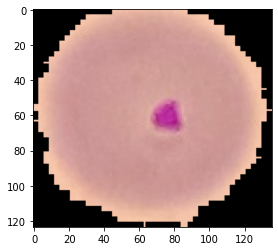

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt


datadir='cell_images'
categories=['Parasitized','Uninfected']

for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)
    plt.show()
    break
  break

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_size=120

In [ ]:
import pickle
def dump_pickle(X,y,valid_img_count,pickle_counter,category):
  
  X=np.array(X).reshape(-1,img_size,img_size,3)
  
  pickle_out=open(os.path.join(datadir,'X_{}_{}'.format(category,pickle_counter) ),"wb" )
  pickle.dump(X,pickle_out)
  pickle_out.close
  print('X_{}_{} Generated\n'.format(category,pickle_counter))
  X=[]
  
  pickle_out=open(os.path.join(datadir,'y_{}_{}'.format(category,pickle_counter) ),"wb" )
  pickle.dump(y,pickle_out)
  pickle_out.close
  print('y_{}_{} Generated\n'.format(category,pickle_counter))
                  

In [ ]:
from tqdm import tqdm 
import pickle


def create_training_data():
  X=[]
  y=[]
  valid_img_count=0
  invalid_images=0
  count=0
  for category in categories:
    path=os.path.join(datadir,category)
    class_num=categories.index(category)
    pickle_counter=0
    
    for img in tqdm(os.listdir(path),desc=category):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        new_array=cv2.resize(img_array2,(img_size,img_size))
        new_array=new_array/255.0
        
        X.append(new_array)
        y.append(class_num)
        
        count+=1
        valid_img_count+=1
  
        
        if count>=2500:
          dump_pickle(X,y,valid_img_count,pickle_counter,category)
          count=0
          pickle_counter+=1
          X=[]
          y=[]
          
      
      except Exception as e:
        invalid_images+=1
        pass
        
    if pickle_counter==5 and count<2500 and category=='Parasitized':
      dump_pickle(X,y,valid_img_count,pickle_counter,category)
      count=0
      X=[]
      y=[]
      
        
    if pickle_counter==5 and count<2500 and category=='Uninfected' :
      dump_pickle(X,y,valid_img_count,pickle_counter,category)
      count=0
      X=[]
      y=[]
  
  
  return pickle_counter

b=create_training_data()

Parasitized:  18%|█▊        | 2451/13780 [00:03<00:15, 748.98it/s]

X_Parasitized_0 Generated

y_Parasitized_0 Generated



Parasitized:  36%|███▌      | 4949/13780 [00:10<00:07, 1159.94it/s]

X_Parasitized_1 Generated

y_Parasitized_1 Generated



Parasitized:  54%|█████▎    | 7406/13780 [00:17<00:05, 1188.31it/s]

X_Parasitized_2 Generated

y_Parasitized_2 Generated



Parasitized:  72%|███████▏  | 9887/13780 [00:24<00:03, 1189.23it/s]

X_Parasitized_3 Generated

y_Parasitized_3 Generated



Parasitized:  90%|█████████ | 12409/13780 [00:34<00:01, 1072.01it/s]

X_Parasitized_4 Generated

y_Parasitized_4 Generated



Parasitized: 100%|██████████| 13780/13780 [00:43<00:00, 314.68it/s]


X_Parasitized_5 Generated

y_Parasitized_5 Generated



Uninfected:  18%|█▊        | 2471/13780 [00:05<00:19, 571.79it/s]

X_Uninfected_0 Generated

y_Uninfected_0 Generated



Uninfected:  36%|███▌      | 4980/13780 [00:14<00:10, 813.12it/s]

X_Uninfected_1 Generated

y_Uninfected_1 Generated



Uninfected:  54%|█████▍    | 7412/13780 [00:23<00:06, 973.21it/s]

X_Uninfected_2 Generated

y_Uninfected_2 Generated



Uninfected:  74%|███████▎  | 10153/13780 [00:38<00:44, 80.94it/s]

X_Uninfected_3 Generated

y_Uninfected_3 Generated



Uninfected:  90%|█████████ | 12424/13780 [00:40<00:01, 1100.40it/s]

X_Uninfected_4 Generated

y_Uninfected_4 Generated



Uninfected: 100%|██████████| 13780/13780 [00:48<00:00, 286.85it/s]


X_Uninfected_5 Generated

y_Uninfected_5 Generated



In [ ]:
%ls cell_images

cell_images/     X_Parasitized_4  X_Uninfected_5   y_Uninfected_0
Parasitized/     X_Parasitized_5  y_Parasitized_0  y_Uninfected_1
Uninfected/      X_Uninfected_0   y_Parasitized_1  y_Uninfected_2
X_Parasitized_0  X_Uninfected_1   y_Parasitized_2  y_Uninfected_3
X_Parasitized_1  X_Uninfected_2   y_Parasitized_3  y_Uninfected_4
X_Parasitized_2  X_Uninfected_3   y_Parasitized_4  y_Uninfected_5
X_Parasitized_3  X_Uninfected_4   y_Parasitized_5


In [ ]:
import random 
import pickle
import os
import numpy as np

for i in range(b+1):
  
  print('--------------------------------------\n ')
  print('Processing-part{}'.format(i))
  
  pickle_in=open(os.path.join(datadir,'X_{}_{}'.format(categories[0],i)) ,'rb')
  Xpara=pickle.load(pickle_in)
  pickle_in.close
  
  pickle_in=open(os.path.join(datadir,'X_{}_{}'.format(categories[1],i)) ,'rb')
  Xuninf=pickle.load(pickle_in)
  pickle_in.close
  
  pickle_in=open(os.path.join(datadir,'y_{}_{}'.format(categories[0],i)) ,'rb')
  ypara=pickle.load(pickle_in)
  pickle_in.close
  
  pickle_in=open(os.path.join(datadir,'y_{}_{}'.format(categories[1],i)) ,'rb')
  yuninf=pickle.load(pickle_in)
  pickle_in.close
  
  X=np.concatenate((Xpara,Xuninf),axis=0)  #https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html
  y=np.concatenate((ypara,yuninf),axis=0)  
  
  print('\nConcatenated successfully-{}'.format(i))
  
  BSHUFFLE=[]
  
  x=0
  for label in y:
    BSHUFFLE.append([X[x],label])
    x+=1
    
  random.shuffle(BSHUFFLE)
  print("\nShuffled Successfully-{}".format(i))
  
  X=[]
  y=[]
  for item in BSHUFFLE:
    X.append(item[0])
    y.append(item[1])
    
  X=np.array(X).reshape(-1,img_size,img_size,3)

  pickle_out=open(os.path.join(datadir,'X_{}'.format(i)),'wb')
  pickle.dump(X,pickle_out)
  pickle_out.close
  
  pickle_out=open(os.path.join(datadir,'y_{}'.format(i)),'wb')
  pickle.dump(y,pickle_out)
  pickle_out.close
  
  print("\nSaved sucessfully-{}".format(i))

--------------------------------------
 
Processing-part0

Concatenated successfully-0

Shuffled Successfully-0

Saved sucessfully-0
--------------------------------------
 
Processing-part1

Concatenated successfully-1

Shuffled Successfully-1

Saved sucessfully-1
--------------------------------------
 
Processing-part2

Concatenated successfully-2

Shuffled Successfully-2

Saved sucessfully-2
--------------------------------------
 
Processing-part3

Concatenated successfully-3

Shuffled Successfully-3

Saved sucessfully-3
--------------------------------------
 
Processing-part4

Concatenated successfully-4

Shuffled Successfully-4

Saved sucessfully-4
--------------------------------------
 
Processing-part5

Concatenated successfully-5

Shuffled Successfully-5

Saved sucessfully-5


In [ ]:
print(b)

5


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Activation,MaxPooling2D,Dropout,Conv2D,Flatten
from tensorflow.keras.models import Sequential

model=Sequential()

model.add(Conv2D (64,(3,3),input_shape=(120,120,3))   )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D (64,(3,3))   )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D (64,(3,3))   )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D (64,(3,3))   )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

epochs=10

for epoch in range(epochs):
  print("EPOCHS-{}".format(epoch))
  for i in range(b+1):
    X=pickle.load(open(os.path.join (datadir,'X_{}'.format(i) ),'rb' ))
    y=pickle.load(open(os.path.join(datadir,'y_{}'.format(i) ),'rb' ))
    
    model.fit(X,np.array(y),batch_size=32,epochs=1,validation_split=0.1)
    model.save("Malaria.model")

EPOCHS-0
141/141 [==============================] - 163s 1s/step - loss: 0.6033 - accuracy: 0.6664 - val_loss: 0.4475 - val_accuracy: 0.8000
INFO:tensorflow:Assets written to: Malaria.model/assets
141/141 [==============================] - 156s 1s/step - loss: 0.3324 - accuracy: 0.8882 - val_loss: 0.2931 - val_accuracy: 0.9140
INFO:tensorflow:Assets written to: Malaria.model/assets
 56/141 [==========>...................] - ETA: 1:34 - loss: 0.2993 - accuracy: 0.9068

KeyboardInterrupt: ignored

In [ ]:
!pip install kora
from kora import console
console.start()  # and click link

     |████████████████████████████████| 57 kB 2.5 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 



In [ ]:
console.start() 

In [ ]:
%ls

cell_images/                           drive/       sample_data/
cell-images-for-detecting-malaria.zip  kaggle.json  Untitled-1.py


In [25]:
from IPython.display import JSON
from google.colab import output
from subprocess import getoutput
import os

def shell(command):
  if command.startswith('cd'):
    path = command.strip().split(maxsplit=1)[1]
    os.chdir(path)
    return JSON([''])
  return JSON([getoutput(command)])
output.register_callback('shell', shell)

In [ ]:
#@title Colab Shell
%%html
<div id=term_demo></div>
<script src="https://code.jquery.com/jquery-latest.js"></script>
<script src="https://cdn.jsdelivr.net/npm/jquery.terminal/js/jquery.terminal.min.js"></script>
<link href="https://cdn.jsdelivr.net/npm/jquery.terminal/css/jquery.terminal.min.css" rel="stylesheet"/>
<script>
  $('#term_demo').terminal(async function(command) {
      if (command !== '') {
          try {
              let res = await google.colab.kernel.invokeFunction('shell', [command])
              let out = res.data['application/json'][0]
              this.echo(new String(out))
          } catch(e) {
              this.error(new String(e));
          }
      } else {
          this.echo('');
      }
  }, {
      greetings: 'Welcome to Colab Shell',
      name: 'colab_demo',
      height: 250,
      prompt: 'colab > '
  });